In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [3]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.7653 - loss: 0.6357 - val_accuracy: 0.8553 - val_loss: 0.4024
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.8708 - loss: 0.3588 - val_accuracy: 0.8815 - val_loss: 0.3310
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.8905 - loss: 0.3022 - val_accuracy: 0.8833 - val_loss: 0.3174
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9030 - loss: 0.2690 - val_accuracy: 0.8882 - val_loss: 0.3097
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.9116 - loss: 0.2395 - val_accuracy: 0.8906 - val_loss: 0.2953


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 2s - 7ms/step - accuracy: 0.8906 - loss: 0.2953

Test accuracy: 0.8906000256538391


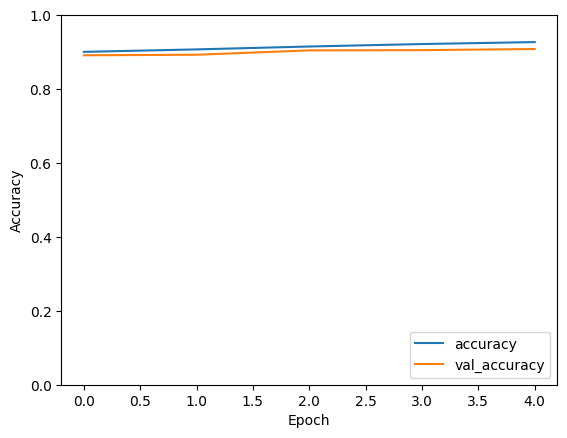

In [ ]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
rand_index=np.random.randint(0, x_test.shape[0])
# print(rand_index)
predicted_label=model.predict(np.expand_dims(x_test[rand_index], axis=0))
print(np.argmax(predicted_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1


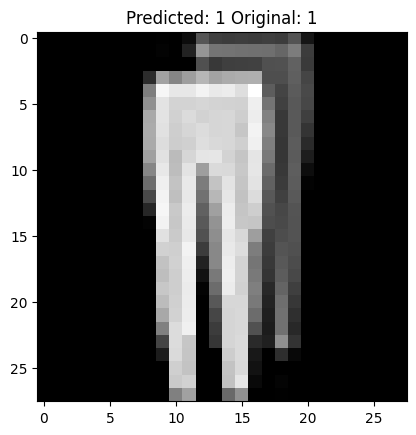

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
5


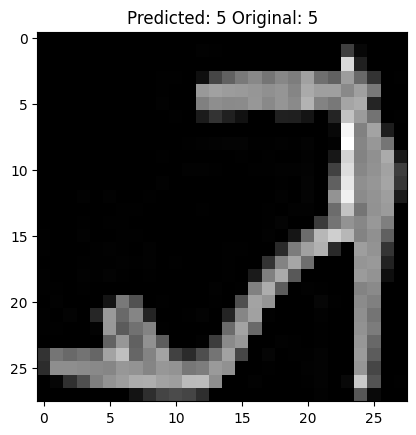

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
7


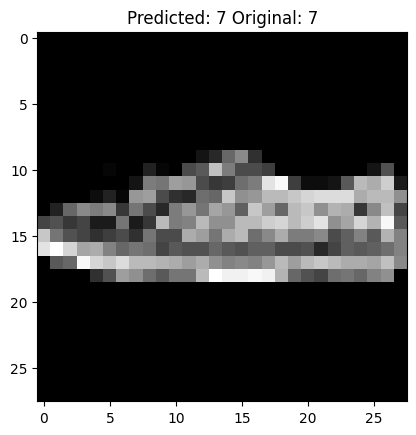

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
9


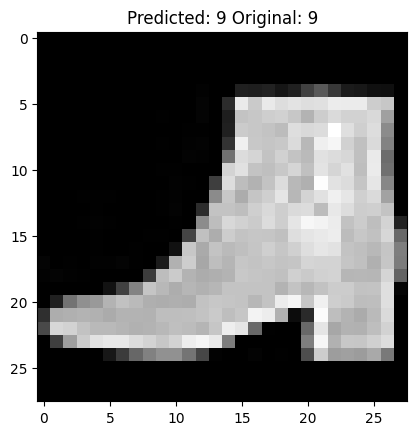

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
7


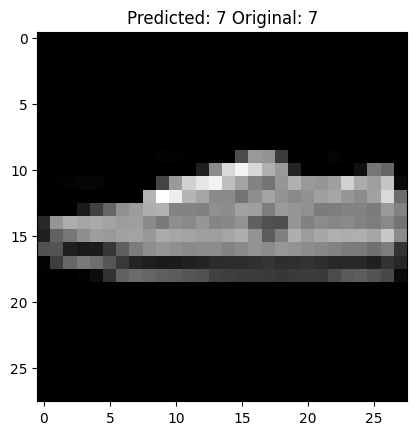

In [ ]:
# predictions = model.predict(x_test)

for i in range(5):
    rand_index=np.random.randint(0, x_test.shape[0])
    # print(rand_index)
    predicted_label=model.predict(np.expand_dims(x_test[rand_index], axis=0))
    print(np.argmax(predicted_label))

    plt.imshow(x_test[rand_index].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predicted_label)} Original: {y_test[rand_index]}')
    plt.show()
